In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from time import perf_counter

# 简单查看一下数据

In [2]:
train= pd.read_csv('E:/HR/aug_train.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

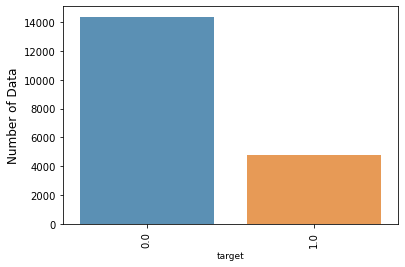

In [4]:
target_v = train['target'].value_counts()  
plt.figure(figsize=(6,4))
sns.barplot(target_v.index, target_v.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
plt.show()

# 预处理

### 数据转换

In [5]:
def gender_to_numeric(x):
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0
    
def rel_experience(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0
    
def enrollment(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course':   return 1 
    if x=='Part time course':   return 2 
    
def edu_level(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1 
    if x=='High School'    :   return 2 
    if x=='Phd'            :   return 3 
    if x=='Primary School' :   return 4 
    
def major(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1 
    if x=='Arts'                   :   return 2 
    if x=='Humanities'             :   return 3 
    if x=='No Major'               :   return 4 
    if x=='Other'                  :   return 5 
    
def experience(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1 
    if x=='2'       :   return 2 
    if x=='3'       :   return 3 
    if x=='4'       :   return 4 
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8 
    if x=='9'       :   return 9 
    if x=='10'      :   return 10 
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13 
    if x=='14'      :   return 14 
    if x=='15'      :   return 15 
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19 
    if x=='20'      :   return 20 
    if x=='>20'     :   return 21 
    
def company_t(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1 
    if x=='Early Stage Startup'   :   return 2 
    if x=='Other'                 :   return 3 
    if x=='Public Sector'         :   return 4 
    if x=='NGO'                   :   return 5 
    
def company_s(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1 
    if x=='100-500'      :   return 2 
    if x=='1000-4999'    :   return 3 
    if x=='10000+'       :   return 4 
    if x=='50-99'        :   return 5 
    if x=='500-999'      :   return 6 
    if x=='5000-9999'    :   return 7
    
def last_job(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 1 
    if x=='2'            :   return 2 
    if x=='3'            :   return 3 
    if x=='4'            :   return 4 
    if x=='>4'           :   return 5 
    
def city(x):
    if x=='city_103'         : return  0
    if x=='city_40'          : return  1
    if x=='city_21'          : return  2
    if x=='city_115'         : return  3
    if x=='city_162'         : return  4
    if x=='city_176'         : return  5
    if x=='city_160'         : return  6
    if x=='city_46'          : return  7
    if x=='city_61'          : return  8
    if x=='city_114'         : return  9
    if x=='city_13'          : return  10
    if x=='city_159'         : return  11
    if x=='city_102'         : return  12
    if x=='city_67'          : return  13
    if x=='city_100'         : return  14
    if x=='city_16'          : return  15
    if x=='city_71'          : return  16
    if x=='city_104'         : return  17
    if x=='city_64'          : return  18
    if x=='city_101'         : return  19
    if x=='city_83'          : return  20
    if x=='city_105'         : return  21
    if x=='city_73'          : return  22
    if x=='city_75'          : return  23
    if x=='city_41'          : return  24
    if x=='city_11'          : return  25
    if x=='city_93'          : return  26
    if x=='city_90'          : return  27
    if x=='city_36'          : return  28
    if x=='city_20'          : return  29
    if x=='city_57'          : return  30
    if x=='city_152'         : return  31
    if x=='city_19'          : return  32
    if x=='city_65'          : return  33
    if x=='city_74'          : return  34
    if x=='city_173'         : return  35
    if x=='city_136'         : return  36
    if x=='city_98'          : return  37
    if x=='city_97'          : return  38
    if x=='city_50'          : return  39
    if x=='city_138'         : return  40
    if x=='city_82'          : return  41
    if x=='city_157'         : return  42
    if x=='city_89'          : return  43
    if x=='city_150'         : return  44
    if x=='city_70'          : return  45
    if x=='city_175'         : return  46
    if x=='city_94'          : return  47
    if x=='city_28'          : return  48
    if x=='city_59'          : return  49
    if x=='city_165'         : return  50
    if x=='city_145'         : return  51
    if x=='city_142'         : return  52
    if x=='city_26'          : return  53
    if x=='city_12'          : return  54
    if x=='city_37'          : return  55
    if x=='city_43'          : return  56
    if x=='city_116'         : return  57
    if x=='city_23'          : return  58
    if x=='city_99'          : return  59
    if x=='city_149'         : return  60
    if x=='city_10'          : return  61
    if x=='city_45'          : return  62
    if x=='city_80'          : return  63
    if x=='city_128'         : return  64
    if x=='city_158'         : return  65
    if x=='city_123'         : return  66
    if x=='city_7'           : return  67
    if x=='city_72'          : return  68
    if x=='city_106'         : return  69
    if x=='city_143'         : return  70
    if x=='city_78'          : return  71
    if x=='city_109'         : return  72
    if x=='city_24'          : return  73
    if x=='city_134'         : return  74
    if x=='city_48'          : return  75
    if x=='city_144'         : return  76
    if x=='city_91'          : return  77
    if x=='city_146'         : return  78
    if x=='city_133'         : return  79
    if x=='city_126'         : return  80
    if x=='city_118'         : return  81
    if x=='city_9'           : return  82
    if x=='city_167'         : return  83
    if x=='city_27'          : return  84
    if x=='city_84'          : return  85
    if x=='city_54'          : return  86
    if x=='city_39'          : return  87
    if x=='city_79'          : return  88
    if x=='city_76'          : return  89
    if x=='city_77'          : return  90
    if x=='city_81'          : return  91
    if x=='city_131'         : return  92
    if x=='city_44'          : return  93
    if x=='city_117'         : return  94
    if x=='city_155'         : return  95
    if x=='city_33'          : return  96
    if x=='city_141'         : return  97
    if x=='city_127'         : return  98
    if x=='city_62'          : return  99
    if x=='city_53'          : return  100
    if x=='city_25'          : return  101
    if x=='city_2'           : return  102
    if x=='city_69'          : return  103
    if x=='city_120'         : return  104
    if x=='city_111'         : return  105
    if x=='city_30'          : return  106
    if x=='city_1'           : return  107
    if x=='city_140'         : return  108
    if x=='city_179'         : return  109
    if x=='city_55'          : return  110
    if x=='city_14'          : return  111
    if x=='city_42'          : return  112
    if x=='city_107'         : return  113
    if x=='city_18'          : return  114
    if x=='city_139'         : return  115
    if x=='city_180'         : return  116
    if x=='city_166'         : return  117
    if x=='city_121'         : return  118
    if x=='city_129'         : return  119
    if x=='city_8'           : return  120
    if x=='city_31'          : return  121
    if x=='city_171'         : return  122

In [6]:
train['gender'] = train['gender'].apply(gender_to_numeric)
train['relevent_experience'] = train['relevent_experience'].apply(rel_experience)
train['enrolled_university'] = train['enrolled_university'].apply(enrollment)
train['education_level'] = train['education_level'].apply(edu_level)
train['major_discipline'] = train['major_discipline'].apply(major)
train['experience'] = train['experience'].apply(experience)
train['company_type'] = train['company_type'].apply(company_t)
train['company_size'] = train['company_size'].apply(company_s)
train['last_new_job'] = train['last_new_job'].apply(last_job)
train['city'] = train['city'].apply(city)

train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.0,1,0.0,0.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,29725,1,0.776,1.0,0,0.0,0.0,0.0,15.0,5.0,0.0,5.0,47,0.0
2,11561,2,0.624,NaN,0,1.0,0.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,33241,3,0.789,NaN,0,NaN,0.0,1.0,0.0,NaN,0.0,0.0,52,1.0
4,666,4,0.767,1.0,1,0.0,1.0,0.0,21.0,5.0,1.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.0,0,0.0,0.0,3.0,14.0,NaN,NaN,1.0,42,1.0
19154,31398,0,0.920,1.0,1,0.0,0.0,0.0,14.0,NaN,NaN,4.0,52,1.0
19155,24576,0,0.920,1.0,1,0.0,0.0,0.0,21.0,5.0,0.0,4.0,44,0.0
19156,5756,33,0.802,1.0,1,0.0,2.0,NaN,0.0,6.0,0.0,2.0,97,0.0


### 缺失值处理

In [7]:
print("是否存在缺失值：",train.isnull().values.any())

是否存在缺失值： True


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int64  
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  float64
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     18772 non-null  float64
 6   education_level         18698 non-null  float64
 7   major_discipline        16345 non-null  float64
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  float64
 10  company_type            13018 non-null  float64
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(10), int64(4)
memory usage:

In [9]:
#为方便，直接用均值填充
train['gender'] = train['gender'].fillna((train['gender'].mean()))
train['enrolled_university'] = train['enrolled_university'].fillna((train['enrolled_university'].mean()))
train['major_discipline'] = train['major_discipline'].fillna((train['major_discipline'].mean()))
train['company_size'] = train['company_size'].fillna((train['company_size'].mean()))
train['company_type'] = train['company_type'].fillna((train['company_type'].mean()))
train['education_level'] = train['education_level'].fillna((train['education_level'].mean()))
train['experience'] = train['experience'].fillna((train['experience'].mean()))
train['last_new_job'] = train['last_new_job'].fillna((train['last_new_job'].mean()))

train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,3.27466,0.690966,1.0,36,1.0
1,29725,1,0.776,1.000000,0,0.000000,0.0,0.000000,15.0,5.00000,0.000000,5.0,47,0.0
2,11561,2,0.624,1.071468,0,1.000000,0.0,0.000000,5.0,3.27466,0.690966,0.0,83,0.0
3,33241,3,0.789,1.071468,0,0.327775,0.0,1.000000,0.0,3.27466,0.000000,0.0,52,1.0
4,666,4,0.767,1.000000,1,0.000000,1.0,0.000000,21.0,5.00000,1.000000,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.000000,0,0.000000,0.0,3.000000,14.0,3.27466,0.690966,1.0,42,1.0
19154,31398,0,0.920,1.000000,1,0.000000,0.0,0.000000,14.0,3.27466,0.690966,4.0,52,1.0
19155,24576,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,5.00000,0.000000,4.0,44,0.0
19156,5756,33,0.802,1.000000,1,0.000000,2.0,0.344876,0.0,6.00000,0.000000,2.0,97,0.0


In [10]:
print("是否存在缺失值：",train.isnull().values.any())

是否存在缺失值： False


### 查看相关性

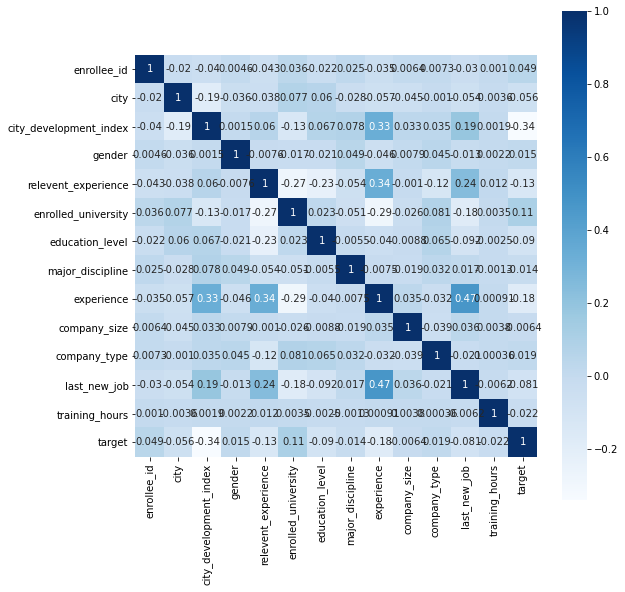

In [11]:
dfData = train.corr()
plt.subplots(figsize=(9, 9)) # 设置画面大小
sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

# 模型

### 数据不平衡处理（后面没有用到）

In [12]:
y = train['target']
X = train.drop(columns=['target'])

In [13]:
from collections import Counter
# 使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE

In [14]:
smo = SMOTE(sampling_strategy=0.5,random_state=42)
X_smo, y_smo = smo.fit_resample(X, y)

In [15]:
print(Counter(y))

Counter({0.0: 14381, 1.0: 4777})


### 划分训练集与测试集

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Y = train['target']
X = train.drop(columns=['target'])
X = ss.fit_transform(X)#特征标准化
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=7)

### 一、随机森林

In [78]:
#随机森林
from sklearn.model_selection import cross_val_score 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [79]:
#默认参数训练模型
RF = RandomForestClassifier(random_state=10)
RF.fit(X_train, Y_train)
pre_RF=RF.predict(X_test)

In [80]:
print ('准确率ACC: %.4f' % metrics.accuracy_score(Y_test,pre_RF))#输出ACC
print('*'*20)
confusion_RF = confusion_matrix(Y_test,pre_RF)
print('混淆矩阵:\n{}'.format(confusion_RF))#测试集混淆矩阵
print('*'*20)
print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_RF))#AUC
print('*'*20)
print ('召回率Recall: %.4f' % metrics.recall_score(Y_test,pre_RF))#召回率
print('*'*20)
print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_RF))#f分

准确率ACC: 0.7773
********************
混淆矩阵:
[[1873  276]
 [ 364  361]]
********************
AUC: 0.6847
********************
召回率Recall: 0.4979
********************
F1-score: 0.5301


In [52]:
#调参
from sklearn.model_selection import GridSearchCV

In [24]:
#树的数目n_estimators
param_test1 = {'n_estimators':range(90,110,1)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5,n_jobs=-1)
gsearch1.fit(X_train,Y_train)

gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.89024034, 0.91464996, 0.91905203, 0.94402232, 0.97181888,
         1.0044261 , 1.00742774, 1.05723658, 1.10044646, 1.09964681,
         1.03503408, 1.09624939, 1.09905405, 1.08947825, 1.14488988,
         1.20350232, 1.11003056, 1.15284619, 1.07327895, 0.88783827]),
  'std_fit_time': array([0.01451038, 0.01347154, 0.01778474, 0.01776101, 0.0137087 ,
         0.02919225, 0.04996008, 0.03409505, 0.06514407, 0.1057597 ,
         0.02943693, 0.08291326, 0.08314018, 0.03093503, 0.07122022,
         0.07153568, 0.02518595, 0.03179677, 0.02247954, 0.05973532]),
  'mean_score_time': array([0.0468153 , 0.05201254, 0.04901118, 0.0492105 , 0.04781103,
         0.056214  , 0.05641265, 0.05181227, 0.05281277, 0.05841374,
         0.05821266, 0.0526094 , 0.05341296, 0.05801358, 0.05301094,
         0.06561561, 0.05461297, 0.05322061, 0.03740835, 0.03180704]),
  'std_score_time': array([0.00120415, 0.00384949, 0.00189723, 0.00193967, 0.00097952,
         0.01297037, 0.0078

In [27]:
#决策树最大深度max_depth
param_test2 = {'max_depth':range(17,22,2),'min_samples_split':range(35,40,1),'min_samples_leaf':range(7,15,2),'max_features':range(3,4,1)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 105, 
                                  oob_score=True, random_state=10),
                        param_grid = param_test2, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch2.fit(X_train,Y_train)

gsearch2.cv_results_, gsearch2.best_params_,gsearch2.best_score_

({'mean_fit_time': array([1.59234824, 1.55415096, 1.56495643, 1.57055545, 1.64017062,
         1.61516609, 1.59341121, 1.56704216, 1.59024649, 1.54140058,
         1.51894474, 1.53394675, 1.5271462 , 1.55275002, 1.60316243,
         1.54635186, 1.58824058, 1.62344737, 1.55343246, 1.55879774,
         1.59439192, 1.63580694, 1.62539587, 1.56018348, 1.77327232,
         1.69166212, 1.59313202, 1.56478519, 1.55368948, 1.5287931 ,
         1.5375926 , 1.52655416, 1.50453873, 1.50753961, 1.52545581,
         1.50294018, 1.51374216, 1.51894383, 1.50113969, 1.51814294,
         1.61116414, 1.56755323, 1.56655378, 1.56655378, 1.57215581,
         1.57992873, 1.616366  , 1.65617371, 1.62256742, 1.6295691 ,
         1.57895932, 1.59956236, 1.59115968, 1.56904945, 1.60476303,
         1.56575513, 1.59236083, 1.49717488, 1.42860045, 1.30937715]),
  'std_fit_time': array([0.01405999, 0.01431187, 0.02398478, 0.03860904, 0.03338614,
         0.0561757 , 0.07290857, 0.05661911, 0.01997867, 0.04377498,

In [101]:
start = perf_counter()
#最佳参数训练模型
RF = RandomForestClassifier(n_estimators= 105, max_depth=19,min_samples_split=38,
                                  min_samples_leaf=7,max_features=3 ,oob_score=True, random_state=10)
RF.fit(X_train, Y_train)
pre_RF=RF.predict(X_test)
print("运行时间是: {:.5f}s".format(perf_counter() - start))

运行时间是: 1.34913s


In [102]:
print ('准确率ACC: %.4f' % metrics.accuracy_score(Y_test,pre_RF))#输出ACC
print('*'*20)
confusion_RF = confusion_matrix(Y_test,pre_RF)
print('混淆矩阵confusion_matrix:\n{}'.format(confusion_RF))#测试集混淆矩阵
print('*'*20)
print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_RF))#AUC
print('*'*20)
print ('召回率Recall: %.4f' % metrics.recall_score(Y_test,pre_RF))#召回率
print('*'*20)
print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_RF))#f分
print('*'*20)
print ('Precesion: %.4f' %metrics.precision_score(Y_test,pre_RF))#精确度

准确率ACC: 0.7909
********************
混淆矩阵confusion_matrix:
[[1858  291]
 [ 310  415]]
********************
AUC: 0.7185
********************
召回率Recall: 0.5724
********************
F1-score: 0.5800
********************
Precesion: 0.5878


### 二、Adaboost

In [81]:
from sklearn.ensemble import AdaBoostClassifier

In [82]:
ada=AdaBoostClassifier(algorithm='SAMME',n_estimators=300,learning_rate=0.1,random_state=10)

In [83]:
ada.fit(X_train, Y_train)
pre_ada=ada.predict(X_test)

In [84]:
print ('准确率ACC: %.4f' % metrics.accuracy_score(Y_test,pre_ada))#输出ACC
print('*'*20)
confusion_ada = confusion_matrix(Y_test,pre_ada)
print('混淆矩阵:\n{}'.format(confusion_ada))#测试集混淆矩阵
print('*'*20)
print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_ada))#AUC
print('*'*20)
print ('召回率Recall: %.4f' % metrics.recall_score(Y_test,pre_ada))#召回率
print('*'*20)
print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_ada))#f分

准确率ACC: 0.7676
********************
混淆矩阵:
[[2021  128]
 [ 540  185]]
********************
AUC: 0.5978
********************
召回率Recall: 0.2552
********************
F1-score: 0.3565


In [27]:
param_test1 = {'algorithm':['SAMME.R','SAMME'],
               'n_estimators':range(100,301,10),
               'learning_rate':[0.05, 0.1, 0.15,0.2]}
gsearch1 = GridSearchCV(estimator = AdaBoostClassifier(algorithm='SAMME',random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5,n_jobs=-1)
gsearch1.fit(X_train,Y_train)

gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([1.94730082, 2.14528909, 2.34859076, 2.66988673, 2.90424452,
         3.13816633, 3.34517159, 3.53344026, 3.91299787, 4.02971373,
         4.13742232, 4.22043042, 4.31543765, 4.40603623, 4.66763315,
         4.79796281, 5.07058864, 5.23181949, 5.34073639, 5.57282619,
         5.86624026, 1.93881111, 2.1254715 , 2.34840732, 2.50513258,
         2.69999294, 2.92990746, 3.04153609, 3.25254636, 3.47619472,
         3.54963307, 3.74579573, 3.98517141, 4.19124804, 4.38646765,
         4.62249908, 4.69851785, 4.92708731, 5.27391343, 5.39176712,
         5.47981153, 5.88126154, 1.90393763, 2.06452041, 2.2796195 ,
         2.50585589, 2.69447155, 2.91639228, 3.1515624 , 3.22952795,
         3.39589801, 3.58901105, 3.77688832, 3.87072673, 4.20273447,
         4.36045794, 4.50370612, 4.78706722, 4.89662013, 5.15613666,
         5.23457069, 5.46323915, 5.5946393 , 1.85465584, 2.07380095,
         2.29331179, 2.41239491, 2.63021164, 2.83892617, 3.00722919,
         3.180106

In [103]:
start = perf_counter()

#最佳参数训练模型
ada = AdaBoostClassifier(algorithm='SAMME.R',n_estimators=210,learning_rate=0.15,random_state=10)

ada.fit(X_train, Y_train)
pre_ada=ada.predict(X_test)
print("运行时间是: {:.5f}s".format(perf_counter() - start))

运行时间是: 1.99675s


In [105]:
print ('准确率ACC: %.4f' % metrics.accuracy_score(Y_test,pre_ada))#输出ACC
print('*'*20)
confusion_ada = confusion_matrix(Y_test,pre_ada)
print('混淆矩阵:\n{}'.format(confusion_ada))#测试集混淆矩阵
print('*'*20)
print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_ada))#AUC
print('*'*20)
print ('召回率Recall: %.4f' % metrics.recall_score(Y_test,pre_ada))#召回率
print('*'*20)
print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_ada))#f分

准确率ACC: 0.7752
********************
混淆矩阵:
[[1998  151]
 [ 495  230]]
********************
AUC: 0.6235
********************
召回率Recall: 0.3172
********************
F1-score: 0.4159


### 三、GBDT

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gbdt = GradientBoostingClassifier(random_state=10)

In [87]:
gbdt.fit(X_train, Y_train)
pre_gbdt=gbdt.predict(X_test)

In [88]:
print ('准确率ACC: %.4f' % metrics.accuracy_score(Y_test,pre_gbdt))#输出ACC
print('*'*20)
confusion = confusion_matrix(Y_test,pre_gbdt)
print('混淆矩阵\n{}'.format(confusion))#测试集混淆矩阵
print('*'*20)
print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_gbdt))#AUC
print('*'*20)
print ('召回率Recall: %.4f' % metrics.recall_score(Y_test,pre_gbdt))#召回率
print('*'*20)
print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_gbdt))#f分
print('*'*20)

准确率ACC: 0.7791
********************
混淆矩阵
[[1891  258]
 [ 377  348]]
********************
AUC: 0.6800
********************
召回率Recall: 0.4800
********************
F1-score: 0.5229
********************


In [35]:
#n_estimators
param_test1 = {'n_estimators':range(45,55,1)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X_train, Y_train)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 53}, 0.801908839548101)

In [36]:
#max_depth，min_samples_split
param_test2 = {'max_depth':range(7,14,1), 'min_samples_split':range(680,760,10)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=53, min_samples_leaf=20, 
      max_features='sqrt', subsample=0.8, random_state=10), 
   param_grid = param_test2, scoring='roc_auc',cv=5,n_jobs=-1)
gsearch2.fit(X_train, Y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 7, 'min_samples_split': 730}, 0.8044147822303005)

In [37]:
#min_samples_split、min_samples_leaf
param_test3 = {'min_samples_split':range(725,735,1), 'min_samples_leaf':range(70,90,2)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=53,max_depth=7,
                                     max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc',cv=5,n_jobs=-1)
gsearch3.fit(X_train, Y_train)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 74, 'min_samples_split': 733}, 0.8045287056954862)

In [38]:
#max_features
param_test4 = {'max_features':range(10,20,1)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=53,max_depth=7, min_samples_leaf =74, 
               min_samples_split =733, subsample=0.8, random_state=10), 
                       param_grid = param_test4, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch4.fit(X_train, Y_train)
gsearch4.best_params_, gsearch4.best_score_

E:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80363171 0.80357011 0.80414322 0.8045758         nan        nan
        nan        nan        nan        nan]
  warnings.warn(


({'max_features': 13}, 0.8045757978634789)

In [39]:
#subsample
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=53,max_depth=7, min_samples_leaf =74, 
               min_samples_split =733, max_features=13, random_state=10), 
                       param_grid = param_test5, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch5.fit(X_train, Y_train)
gsearch5.best_params_, gsearch5.best_score_

({'subsample': 0.8}, 0.8045757978634789)

In [106]:
start = perf_counter()
gbdt = GradientBoostingClassifier(learning_rate=0.1, n_estimators=53,max_depth=7, min_samples_leaf =74, 
               min_samples_split =733, max_features=13,subsample=0.8, random_state=10)
gbdt.fit(X_train, Y_train)
pre_gbdt=gbdt.predict(X_test)
print("运行时间是: {:.5f}s".format(perf_counter() - start))

运行时间是: 1.35414s


In [107]:
print ('ACC: %.4f' % metrics.accuracy_score(Y_test,pre_gbdt))#输出ACC
print('*'*20)
confusion = confusion_matrix(Y_test,pre_gbdt)
print('confusion_matrix:\n{}'.format(confusion))#测试集混淆矩阵
print('*'*20)
print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_gbdt))#AUC
print('*'*20)
print ('Recall: %.4f' % metrics.recall_score(Y_test,pre_gbdt))#召回率
print('*'*20)
print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_gbdt))#f分
print('*'*20)
from sklearn.metrics import roc_auc_score
roc_auc1 = roc_auc_score(Y_test, pre_gbdt)
print("Area under the ROC curve : %f" % roc_auc1)

ACC: 0.7804
********************
confusion_matrix:
[[1830  319]
 [ 312  413]]
********************
AUC: 0.7106
********************
Recall: 0.5697
********************
F1-score: 0.5669
********************
Area under the ROC curve : 0.710607


### 四、LightGBM

In [89]:
import lightgbm as lgb

In [90]:
gbm = lgb.LGBMClassifier(random_state=10)
gbm.fit(X_train, Y_train)

LGBMClassifier(random_state=10)

In [91]:
pre_gbm = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [92]:
print ('ACC: %.4f' % metrics.accuracy_score(Y_test,pre_gbm))#输出ACC
print('*'*20)
confusion = confusion_matrix(Y_test,pre_gbm)
print('混淆矩阵:\n{}'.format(confusion))#测试集混淆矩阵
print('*'*20)
print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_gbm))#AUC
print('*'*20)
print ('Recall: %.4f' % metrics.recall_score(Y_test,pre_gbm))#召回率
print('*'*20)
print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_gbm))#f分
print('*'*20)
from sklearn.metrics import roc_auc_score
roc_auc1 = roc_auc_score(Y_test, pre_gbm)
print("Area under the ROC curve : %f" % roc_auc1)

ACC: 0.7832
********************
混淆矩阵:
[[1831  318]
 [ 305  420]]
********************
AUC: 0.7157
********************
Recall: 0.5793
********************
F1-score: 0.5742
********************
Area under the ROC curve : 0.715667


In [46]:
#num_leaves，max_depth
param_test1 = {'num_leaves': range(9, 30, 1), 'max_depth': range(1,11,2)}
gsearch1 = GridSearchCV(estimator = lgb.LGBMClassifier(n_estimators=66,random_state=10),
                        param_grid = param_test1, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch1.fit(X_train,Y_train)

gsearch1.best_params_,gsearch1.best_score_

({'max_depth': 5, 'num_leaves': 11}, 0.8042960469279791)

In [47]:
# maxbin,min_data_in_leaf
param_test2 = {'max_bin': range(38,45,1), 'min_data_in_leaf': range(2, 10, 1)}
gsearch2 = GridSearchCV(estimator = lgb.LGBMClassifier(n_estimators=66,max_depth=5,num_leaves=11,random_state=10),
                        param_grid = param_test2, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch2.fit(X_train,Y_train)

gsearch2.best_params_,gsearch2.best_score_

({'max_bin': 40, 'min_data_in_leaf': 4}, 0.8047894734423029)

In [48]:
#bagging_fraction,bagging_freq,feature_fraction
param_test3 = {'bagging_fraction': [i/100 for i in range(50,58,1)],
               'bagging_freq': range(0,5,1),
              'feature_fraction': [i/100 for i in range(55,65,1)]
              }
gsearch3 = GridSearchCV(estimator = lgb.LGBMClassifier(n_estimators=66,max_depth=5,num_leaves=11,min_data_in_leaf=4,
                                   max_bin=40,random_state=10),
                        param_grid = param_test3, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch3.fit(X_train,Y_train)

gsearch3.best_params_,gsearch3.best_score_

({'bagging_fraction': 0.55, 'bagging_freq': 2, 'feature_fraction': 0.58},
 0.804680445198026)

In [49]:
#lambda_l1,lambda_l2
param_test4={'lambda_l1': [0,1e-5,1e-3,1e-1,0.0,0.1,0.3,0.5,0.7,0.9,1.0],
              'lambda_l2': [0,1e-5,1e-3,1e-1,0.0,0.1,0.3,0.5,0.7,0.9,1.0]}

gsearch4 = GridSearchCV(estimator = lgb.LGBMClassifier(n_estimators=66,max_depth=5,num_leaves=11,min_data_in_leaf=4,
                                   max_bin=40,bagging_fraction=0.55,bagging_freq=2,feature_fraction=0.58,random_state=10),
                        param_grid = param_test4, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch4.fit(X_train,Y_train)

gsearch4.best_params_,gsearch4.best_score_

({'lambda_l1': 1e-05, 'lambda_l2': 0.1}, 0.8058822708837651)

In [50]:
#min_split_gain
param_test5 = {'min_split_gain': [i/100 for i in range(0,100,1)]}
gsearch5 = GridSearchCV(estimator = lgb.LGBMClassifier(n_estimators=66,max_depth=5,num_leaves=11,min_data_in_leaf=4,
                                   max_bin=40,bagging_fraction=0.55,bagging_freq=2,feature_fraction=0.58,
                                 lambda_l1=1e-05,lambda_l2=0.1,random_state=10 ),
                        param_grid = param_test5, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch5.fit(X_train,Y_train)

gsearch5.best_params_,gsearch5.best_score_

({'min_split_gain': 0.04}, 0.8062790789963238)

In [51]:
#n_estimators
param_test6 = {'n_estimators': range(800,2000,100)}
gsearch6 = GridSearchCV(estimator = lgb.LGBMClassifier(max_depth=5,num_leaves=11,min_data_in_leaf=4,
                                   max_bin=40,bagging_fraction=0.55,bagging_freq=2,feature_fraction=0.58,
                                 lambda_l1=1e-05,lambda_l2=0.1,min_split_gain=0.04,random_state=10),
                        param_grid = param_test6, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch6.fit(X_train,Y_train)

gsearch6.best_params_,gsearch6.best_score_

({'n_estimators': 800}, 0.7892254186226836)

In [108]:
start = perf_counter()
gbm=lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',metrics='auc',learning_rate=0.01,
                         n_estimators=1000,max_depth=5,num_leaves=11,min_data_in_leaf=4,
                                   max_bin=40,bagging_fraction=0.55,bagging_freq=2,feature_fraction=0.58,
                                 lambda_l1=1e-05,lambda_l2=0.1,min_split_gain=0.04,random_state=10)
gbm.fit(X_train,Y_train)
print("运行时间是: {:.5f}s".format(perf_counter() - start))

[LightGBM] [Warning] feature_fraction is set=0.58, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.58
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] lambda_l1 is set=1e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1e-05
[LightGBM] [Warning] bagging_fraction is set=0.55, subsample=1.0 will be ignored. Current value: bagging_fraction=0.55
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
运行时间是: 0.57785s


In [109]:
pre_gbm = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print ('ACC: %.4f' % metrics.accuracy_score(Y_test,pre_gbm))#输出ACC
print('*'*20)
confusion = confusion_matrix(Y_test,pre_gbm)
print('混淆矩阵\n{}'.format(confusion))#测试集混淆矩阵
print('*'*20)
print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_gbm))#AUC
print('*'*20)
print ('Recall: %.4f' % metrics.recall_score(Y_test,pre_gbm))#召回率
print('*'*20)
print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_gbm))#f分

ACC: 0.7878
********************
混淆矩阵
[[1855  294]
 [ 316  409]]
********************
AUC: 0.7137
********************
Recall: 0.5641
********************
F1-score: 0.5728


### 五、XGBoost

In [93]:
from xgboost.sklearn import XGBClassifier

In [94]:
xgb1 = XGBClassifier(seed = 10)
eval_set = [(X_train, Y_train), (X_test, Y_test)]
eval_metric = ["auc","error"]
%time 
xgb1.fit(X_train, Y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True,early_stopping_rounds=10)

Wall time: 0 ns
[0]	validation_0-auc:0.80125	validation_0-error:0.20271	validation_1-auc:0.77431	validation_1-error:0.22129
[1]	validation_0-auc:0.81079	validation_0-error:0.19774	validation_1-auc:0.78081	validation_1-error:0.22060
[2]	validation_0-auc:0.81923	validation_0-error:0.19670	validation_1-auc:0.77969	validation_1-error:0.21851
[3]	validation_0-auc:0.82635	validation_0-error:0.19430	validation_1-auc:0.78186	validation_1-error:0.21677
[4]	validation_0-auc:0.83018	validation_0-error:0.19277	validation_1-auc:0.78160	validation_1-error:0.21573
[5]	validation_0-auc:0.83453	validation_0-error:0.19056	validation_1-auc:0.78536	validation_1-error:0.21642
[6]	validation_0-auc:0.83774	validation_0-error:0.18822	validation_1-auc:0.78616	validation_1-error:0.21573
[7]	validation_0-auc:0.84151	validation_0-error:0.18558	validation_1-auc:0.78623	validation_1-error:0.21538
[8]	validation_0-auc:0.84508	validation_0-error:0.18355	validation_1-auc:0.78732	validation_1-error:0.21538
[9]	validati

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [95]:
xgb1.fit(X_train, Y_train)

[13:31:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [96]:
pre_xgb = xgb1.predict(X_test)
print ('ACC: %.4f' % metrics.accuracy_score(Y_test,pre_xgb))#输出ACC
print('*'*20)
confusion = confusion_matrix(Y_test,pre_xgb)
print('混淆矩阵:\n{}'.format(confusion))#测试集混淆矩阵
print('*'*20)
print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_xgb))#AUC
print('*'*20)
print ('Recall: %.4f' % metrics.recall_score(Y_test,pre_xgb))#召回率
print('*'*20)
print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_xgb))#f分
print('*'*20)
from sklearn.metrics import roc_auc_score
roc_auc1 = roc_auc_score(Y_test, pre_xgb)
print("Area under the ROC curve : %f" % roc_auc1)

ACC: 0.7707
********************
混淆矩阵:
[[1871  278]
 [ 381  344]]
********************
AUC: 0.6726
********************
Recall: 0.4745
********************
F1-score: 0.5108
********************
Area under the ROC curve : 0.672560


In [59]:
#max_depth,min_child_weight
param_test1 = {'max_depth':range(1,10,1),'min_child_weight': range(46,55,1)}
gsearch1 = GridSearchCV(estimator = XGBClassifier(n_estimators=25,learning_rate=0.1,seed=10),
                        param_grid = param_test1, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch1.fit(X_train,Y_train)

gsearch1.best_params_,gsearch1.best_score_

[20:38:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


({'max_depth': 6, 'min_child_weight': 52}, 0.8022508229572131)

In [60]:
#gamma
param_test2 = {'gamma':[i/10 for i in range(0,5,1)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier(n_estimators=100,learning_rate=0.1,seed=10,
                                max_depth=6,min_child_weight=52),
                        param_grid = param_test2, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch2.fit(X_train,Y_train)

gsearch2.best_params_,gsearch2.best_score_

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:38:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'gamma': 0.2}, 0.803849075245654)

In [61]:
# subsample,colsample_bytree
param_test3 = {'subsample':[i/1000.0 for i in range(500,520,2)],
 'colsample_bytree':[i/1000 for i in range(150,170,2)]}
gsearch3 = GridSearchCV(estimator = XGBClassifier(n_estimators=1000,learning_rate=0.1,seed=10,
                                max_depth=6,min_child_weight=52,
                             gamma=0.2 ),
                        param_grid = param_test3, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch3.fit(X_train,Y_train)

gsearch3.best_params_,gsearch3.best_score_

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'colsample_bytree': 0.154, 'subsample': 0.512}, 0.8012439323957012)

In [62]:
#reg_alpha
param_test4 = {'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}
gsearch4 = GridSearchCV(estimator = XGBClassifier(n_estimators=1000,learning_rate=0.1,seed=10,
                                max_depth=6,min_child_weight=52,
                             gamma=0.2 ,
                        subsample=0.512, colsample_bytree=0.154 ),
                        param_grid = param_test4, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch4.fit(X_train,Y_train)

gsearch4.best_params_,gsearch4.best_score_

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'reg_alpha': 0.001}, 0.8012927156746447)

In [110]:
start = perf_counter()
xgb1 = XGBClassifier(max_depth=6,
                     learning_rate=0.01,
                     n_estimators=300,
                     objective='binary:logistic',
                     booster='gbtree',
                     n_jobs=-1,
                     gamma=0.2,
                     min_child_weight=52,
                     subsample=0.38, 
                     colsample_bytree=0.85,
                     reg_alpha=0.01,
                     seed=10)

xgb1.fit(X_train, Y_train)#训练模型
print("运行时间是: {:.5f}s".format(perf_counter() - start))

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:38:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
运行时间是: 0.98348s


In [111]:
pre_xgb1=xgb1.predict(X_test)
print ('ACC: %.4f' % metrics.accuracy_score(Y_test,pre_xgb1))#输出ACC
print('*'*20)
confusion_RF = confusion_matrix(Y_test,pre_xgb1)
print('confusion_matrix:\n{}'.format(confusion_RF))#测试集混淆矩阵
print('*'*20)
print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_xgb1))#AUC
print('*'*20)
print ('Recall: %.4f' % metrics.recall_score(Y_test,pre_xgb1))#召回率
print('*'*20)
print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_xgb1))#f分
print('*'*20)
print ('Precesion: %.4f' %metrics.precision_score(Y_test,pre_xgb1))#精确度
print('*'*20)

ACC: 0.7881
********************
confusion_matrix:
[[1853  296]
 [ 313  412]]
********************
AUC: 0.7153
********************
Recall: 0.5683
********************
F1-score: 0.5750
********************
Precesion: 0.5819
********************


### 六、CatBoost

In [97]:
from catboost import CatBoostClassifier

In [98]:
cbt =  CatBoostClassifier(random_seed=10)

In [99]:
cbt.fit(X_train, Y_train,eval_set=[(X_test, Y_test)])

Learning rate set to 0.063127
0:	learn: 0.6590342	test: 0.6605057	best: 0.6605057 (0)	total: 9.18ms	remaining: 9.17s
1:	learn: 0.6290980	test: 0.6317054	best: 0.6317054 (1)	total: 17.1ms	remaining: 8.52s
2:	learn: 0.6039323	test: 0.6077016	best: 0.6077016 (2)	total: 25.3ms	remaining: 8.4s
3:	learn: 0.5831046	test: 0.5876993	best: 0.5876993 (3)	total: 33.3ms	remaining: 8.28s
4:	learn: 0.5650424	test: 0.5702894	best: 0.5702894 (4)	total: 41.5ms	remaining: 8.25s
5:	learn: 0.5474197	test: 0.5535340	best: 0.5535340 (5)	total: 49.1ms	remaining: 8.13s
6:	learn: 0.5340336	test: 0.5408345	best: 0.5408345 (6)	total: 57.5ms	remaining: 8.15s
7:	learn: 0.5219169	test: 0.5298997	best: 0.5298997 (7)	total: 65.5ms	remaining: 8.12s
8:	learn: 0.5128104	test: 0.5210313	best: 0.5210313 (8)	total: 74.6ms	remaining: 8.22s
9:	learn: 0.5058019	test: 0.5144836	best: 0.5144836 (9)	total: 82.3ms	remaining: 8.15s
10:	learn: 0.4966731	test: 0.5061884	best: 0.5061884 (10)	total: 89.6ms	remaining: 8.05s
11:	learn: 0

107:	learn: 0.4155959	test: 0.4471560	best: 0.4468292 (97)	total: 893ms	remaining: 7.38s
108:	learn: 0.4154366	test: 0.4471229	best: 0.4468292 (97)	total: 902ms	remaining: 7.37s
109:	learn: 0.4152140	test: 0.4471452	best: 0.4468292 (97)	total: 911ms	remaining: 7.37s
110:	learn: 0.4151185	test: 0.4471095	best: 0.4468292 (97)	total: 919ms	remaining: 7.36s
111:	learn: 0.4149947	test: 0.4470360	best: 0.4468292 (97)	total: 929ms	remaining: 7.36s
112:	learn: 0.4148060	test: 0.4470350	best: 0.4468292 (97)	total: 937ms	remaining: 7.35s
113:	learn: 0.4146296	test: 0.4469883	best: 0.4468292 (97)	total: 946ms	remaining: 7.35s
114:	learn: 0.4144237	test: 0.4470167	best: 0.4468292 (97)	total: 956ms	remaining: 7.36s
115:	learn: 0.4142548	test: 0.4469958	best: 0.4468292 (97)	total: 965ms	remaining: 7.35s
116:	learn: 0.4140788	test: 0.4470639	best: 0.4468292 (97)	total: 973ms	remaining: 7.34s
117:	learn: 0.4138864	test: 0.4471782	best: 0.4468292 (97)	total: 981ms	remaining: 7.33s
118:	learn: 0.4137011

213:	learn: 0.3971640	test: 0.4477221	best: 0.4468292 (97)	total: 1.79s	remaining: 6.58s
214:	learn: 0.3970384	test: 0.4477427	best: 0.4468292 (97)	total: 1.8s	remaining: 6.58s
215:	learn: 0.3969580	test: 0.4477419	best: 0.4468292 (97)	total: 1.81s	remaining: 6.57s
216:	learn: 0.3968131	test: 0.4478096	best: 0.4468292 (97)	total: 1.82s	remaining: 6.56s
217:	learn: 0.3967009	test: 0.4477321	best: 0.4468292 (97)	total: 1.83s	remaining: 6.55s
218:	learn: 0.3965398	test: 0.4476465	best: 0.4468292 (97)	total: 1.83s	remaining: 6.54s
219:	learn: 0.3963398	test: 0.4476707	best: 0.4468292 (97)	total: 1.84s	remaining: 6.53s
220:	learn: 0.3962771	test: 0.4477091	best: 0.4468292 (97)	total: 1.85s	remaining: 6.52s
221:	learn: 0.3960802	test: 0.4477074	best: 0.4468292 (97)	total: 1.86s	remaining: 6.51s
222:	learn: 0.3958738	test: 0.4478233	best: 0.4468292 (97)	total: 1.86s	remaining: 6.5s
223:	learn: 0.3957872	test: 0.4477958	best: 0.4468292 (97)	total: 1.87s	remaining: 6.49s
224:	learn: 0.3955564	t

320:	learn: 0.3800959	test: 0.4483819	best: 0.4468292 (97)	total: 2.68s	remaining: 5.67s
321:	learn: 0.3799583	test: 0.4484704	best: 0.4468292 (97)	total: 2.69s	remaining: 5.67s
322:	learn: 0.3798047	test: 0.4484766	best: 0.4468292 (97)	total: 2.7s	remaining: 5.66s
323:	learn: 0.3796591	test: 0.4484556	best: 0.4468292 (97)	total: 2.71s	remaining: 5.65s
324:	learn: 0.3794731	test: 0.4484732	best: 0.4468292 (97)	total: 2.71s	remaining: 5.64s
325:	learn: 0.3793297	test: 0.4485139	best: 0.4468292 (97)	total: 2.72s	remaining: 5.63s
326:	learn: 0.3791924	test: 0.4484761	best: 0.4468292 (97)	total: 2.73s	remaining: 5.62s
327:	learn: 0.3790127	test: 0.4486146	best: 0.4468292 (97)	total: 2.74s	remaining: 5.61s
328:	learn: 0.3788668	test: 0.4486799	best: 0.4468292 (97)	total: 2.75s	remaining: 5.6s
329:	learn: 0.3786149	test: 0.4487107	best: 0.4468292 (97)	total: 2.75s	remaining: 5.59s
330:	learn: 0.3783669	test: 0.4488286	best: 0.4468292 (97)	total: 2.76s	remaining: 5.58s
331:	learn: 0.3782617	t

427:	learn: 0.3636221	test: 0.4502386	best: 0.4468292 (97)	total: 3.58s	remaining: 4.79s
428:	learn: 0.3634880	test: 0.4503170	best: 0.4468292 (97)	total: 3.59s	remaining: 4.78s
429:	learn: 0.3633614	test: 0.4503684	best: 0.4468292 (97)	total: 3.6s	remaining: 4.77s
430:	learn: 0.3631592	test: 0.4505164	best: 0.4468292 (97)	total: 3.61s	remaining: 4.76s
431:	learn: 0.3629624	test: 0.4504610	best: 0.4468292 (97)	total: 3.62s	remaining: 4.76s
432:	learn: 0.3628343	test: 0.4503528	best: 0.4468292 (97)	total: 3.63s	remaining: 4.75s
433:	learn: 0.3626973	test: 0.4503372	best: 0.4468292 (97)	total: 3.63s	remaining: 4.74s
434:	learn: 0.3625658	test: 0.4503497	best: 0.4468292 (97)	total: 3.64s	remaining: 4.73s
435:	learn: 0.3624115	test: 0.4504025	best: 0.4468292 (97)	total: 3.65s	remaining: 4.72s
436:	learn: 0.3622055	test: 0.4503617	best: 0.4468292 (97)	total: 3.66s	remaining: 4.71s
437:	learn: 0.3620065	test: 0.4503388	best: 0.4468292 (97)	total: 3.67s	remaining: 4.71s
438:	learn: 0.3619032	

537:	learn: 0.3483088	test: 0.4526514	best: 0.4468292 (97)	total: 4.49s	remaining: 3.85s
538:	learn: 0.3481067	test: 0.4527865	best: 0.4468292 (97)	total: 4.5s	remaining: 3.85s
539:	learn: 0.3478992	test: 0.4528594	best: 0.4468292 (97)	total: 4.5s	remaining: 3.84s
540:	learn: 0.3477968	test: 0.4529354	best: 0.4468292 (97)	total: 4.51s	remaining: 3.83s
541:	learn: 0.3476541	test: 0.4530080	best: 0.4468292 (97)	total: 4.52s	remaining: 3.82s
542:	learn: 0.3474995	test: 0.4531033	best: 0.4468292 (97)	total: 4.53s	remaining: 3.81s
543:	learn: 0.3473410	test: 0.4530798	best: 0.4468292 (97)	total: 4.54s	remaining: 3.8s
544:	learn: 0.3471932	test: 0.4530650	best: 0.4468292 (97)	total: 4.55s	remaining: 3.8s
545:	learn: 0.3470420	test: 0.4530537	best: 0.4468292 (97)	total: 4.56s	remaining: 3.79s
546:	learn: 0.3469064	test: 0.4530401	best: 0.4468292 (97)	total: 4.57s	remaining: 3.78s
547:	learn: 0.3467685	test: 0.4530677	best: 0.4468292 (97)	total: 4.57s	remaining: 3.77s
548:	learn: 0.3466284	tes

645:	learn: 0.3341815	test: 0.4548055	best: 0.4468292 (97)	total: 5.39s	remaining: 2.95s
646:	learn: 0.3340582	test: 0.4548900	best: 0.4468292 (97)	total: 5.4s	remaining: 2.94s
647:	learn: 0.3339410	test: 0.4549569	best: 0.4468292 (97)	total: 5.41s	remaining: 2.94s
648:	learn: 0.3337887	test: 0.4549273	best: 0.4468292 (97)	total: 5.41s	remaining: 2.93s
649:	learn: 0.3336447	test: 0.4549202	best: 0.4468292 (97)	total: 5.42s	remaining: 2.92s
650:	learn: 0.3335255	test: 0.4548886	best: 0.4468292 (97)	total: 5.43s	remaining: 2.91s
651:	learn: 0.3334509	test: 0.4549155	best: 0.4468292 (97)	total: 5.44s	remaining: 2.9s
652:	learn: 0.3333785	test: 0.4548751	best: 0.4468292 (97)	total: 5.45s	remaining: 2.9s
653:	learn: 0.3332752	test: 0.4548866	best: 0.4468292 (97)	total: 5.46s	remaining: 2.89s
654:	learn: 0.3332240	test: 0.4549077	best: 0.4468292 (97)	total: 5.47s	remaining: 2.88s
655:	learn: 0.3331060	test: 0.4549024	best: 0.4468292 (97)	total: 5.47s	remaining: 2.87s
656:	learn: 0.3330061	te

745:	learn: 0.3226146	test: 0.4554159	best: 0.4468292 (97)	total: 6.29s	remaining: 2.14s
746:	learn: 0.3224955	test: 0.4553967	best: 0.4468292 (97)	total: 6.29s	remaining: 2.13s
747:	learn: 0.3223384	test: 0.4554505	best: 0.4468292 (97)	total: 6.3s	remaining: 2.12s
748:	learn: 0.3222092	test: 0.4554952	best: 0.4468292 (97)	total: 6.31s	remaining: 2.11s
749:	learn: 0.3220506	test: 0.4555416	best: 0.4468292 (97)	total: 6.32s	remaining: 2.11s
750:	learn: 0.3219289	test: 0.4555954	best: 0.4468292 (97)	total: 6.33s	remaining: 2.1s
751:	learn: 0.3218053	test: 0.4555708	best: 0.4468292 (97)	total: 6.33s	remaining: 2.09s
752:	learn: 0.3217126	test: 0.4556553	best: 0.4468292 (97)	total: 6.34s	remaining: 2.08s
753:	learn: 0.3215477	test: 0.4555711	best: 0.4468292 (97)	total: 6.35s	remaining: 2.07s
754:	learn: 0.3215014	test: 0.4556116	best: 0.4468292 (97)	total: 6.36s	remaining: 2.06s
755:	learn: 0.3213845	test: 0.4557110	best: 0.4468292 (97)	total: 6.37s	remaining: 2.05s
756:	learn: 0.3212584	t

851:	learn: 0.3113197	test: 0.4568171	best: 0.4468292 (97)	total: 7.18s	remaining: 1.25s
852:	learn: 0.3111803	test: 0.4568235	best: 0.4468292 (97)	total: 7.19s	remaining: 1.24s
853:	learn: 0.3110703	test: 0.4568007	best: 0.4468292 (97)	total: 7.2s	remaining: 1.23s
854:	learn: 0.3109253	test: 0.4569205	best: 0.4468292 (97)	total: 7.2s	remaining: 1.22s
855:	learn: 0.3108549	test: 0.4569776	best: 0.4468292 (97)	total: 7.21s	remaining: 1.21s
856:	learn: 0.3107656	test: 0.4569171	best: 0.4468292 (97)	total: 7.22s	remaining: 1.2s
857:	learn: 0.3106693	test: 0.4569946	best: 0.4468292 (97)	total: 7.23s	remaining: 1.2s
858:	learn: 0.3105780	test: 0.4569047	best: 0.4468292 (97)	total: 7.24s	remaining: 1.19s
859:	learn: 0.3104644	test: 0.4569118	best: 0.4468292 (97)	total: 7.25s	remaining: 1.18s
860:	learn: 0.3103808	test: 0.4569873	best: 0.4468292 (97)	total: 7.25s	remaining: 1.17s
861:	learn: 0.3102573	test: 0.4569768	best: 0.4468292 (97)	total: 7.26s	remaining: 1.16s
862:	learn: 0.3101618	tes

962:	learn: 0.3006172	test: 0.4597568	best: 0.4468292 (97)	total: 8.08s	remaining: 311ms
963:	learn: 0.3004977	test: 0.4598843	best: 0.4468292 (97)	total: 8.09s	remaining: 302ms
964:	learn: 0.3003944	test: 0.4597869	best: 0.4468292 (97)	total: 8.1s	remaining: 294ms
965:	learn: 0.3003536	test: 0.4598274	best: 0.4468292 (97)	total: 8.11s	remaining: 285ms
966:	learn: 0.3002831	test: 0.4598134	best: 0.4468292 (97)	total: 8.12s	remaining: 277ms
967:	learn: 0.3001818	test: 0.4599232	best: 0.4468292 (97)	total: 8.12s	remaining: 269ms
968:	learn: 0.3001384	test: 0.4598895	best: 0.4468292 (97)	total: 8.13s	remaining: 260ms
969:	learn: 0.3000609	test: 0.4599920	best: 0.4468292 (97)	total: 8.14s	remaining: 252ms
970:	learn: 0.2999344	test: 0.4600001	best: 0.4468292 (97)	total: 8.15s	remaining: 243ms
971:	learn: 0.2999183	test: 0.4600104	best: 0.4468292 (97)	total: 8.16s	remaining: 235ms
972:	learn: 0.2998461	test: 0.4600386	best: 0.4468292 (97)	total: 8.16s	remaining: 227ms
973:	learn: 0.2997719	

In [100]:
pre_cbt=cbt.predict(X_test)
print ('ACC: %.4f' % metrics.accuracy_score(Y_test,pre_cbt))#输出ACC
print('*'*20)
confusion_RF = confusion_matrix(Y_test,pre_cbt)
print('confusion_matrix:\n{}'.format(confusion_RF))#测试集混淆矩阵
print('*'*20)
print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_cbt))#AUC
print('*'*20)
print ('Recall: %.4f' % metrics.recall_score(Y_test,pre_cbt))#召回率
print('*'*20)
print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_cbt))#f分
print ('Precesion: %.4f' %metrics.precision_score(Y_test,pre_cbt))#精确度

ACC: 0.7836
********************
confusion_matrix:
[[1869  280]
 [ 342  383]]
********************
AUC: 0.6990
********************
Recall: 0.5283
********************
F1-score: 0.5519
Precesion: 0.5777


In [71]:
#depth,learning_rate,l2_leaf_reg,iterations
param_test1 =  {'depth': range(3,10,1),
          'learning_rate' : [0.05, 0.1, 0.15],
         'l2_leaf_reg': range(1,5,1),
         'iterations': range(120,200,10)}
gsearch1 = GridSearchCV(estimator = CatBoostClassifier(random_seed=10),
                        param_grid = param_test1, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch1.fit(X_train,Y_train)

gsearch1.best_params_,gsearch2.best_score_

0:	learn: 0.6733285	total: 30.6ms	remaining: 5.47s
1:	learn: 0.6551728	total: 34.6ms	remaining: 3.08s
2:	learn: 0.6390395	total: 38.4ms	remaining: 2.26s
3:	learn: 0.6240684	total: 42.3ms	remaining: 1.86s
4:	learn: 0.6100091	total: 46.3ms	remaining: 1.62s
5:	learn: 0.5969376	total: 50.1ms	remaining: 1.45s
6:	learn: 0.5850987	total: 53.7ms	remaining: 1.33s
7:	learn: 0.5743736	total: 57.5ms	remaining: 1.24s
8:	learn: 0.5657521	total: 61.2ms	remaining: 1.16s
9:	learn: 0.5573984	total: 65ms	remaining: 1.1s
10:	learn: 0.5495841	total: 68.8ms	remaining: 1.06s
11:	learn: 0.5419111	total: 73ms	remaining: 1.02s
12:	learn: 0.5340026	total: 76.8ms	remaining: 986ms
13:	learn: 0.5271628	total: 80.7ms	remaining: 957ms
14:	learn: 0.5205176	total: 84.7ms	remaining: 931ms
15:	learn: 0.5141814	total: 88.6ms	remaining: 908ms
16:	learn: 0.5086058	total: 92.4ms	remaining: 886ms
17:	learn: 0.5045465	total: 96.2ms	remaining: 866ms
18:	learn: 0.5008262	total: 100ms	remaining: 847ms
19:	learn: 0.4962687	total: 

({'depth': 7, 'iterations': 180, 'l2_leaf_reg': 2, 'learning_rate': 0.05},
 0.803849075245654)

In [112]:
start = perf_counter()
cbt = CatBoostClassifier(depth=7,
                        iterations=180,
                        learning_rate=0.05,
                        l2_leaf_reg=2)
cbt.fit(X_train,Y_train,eval_set=[(X_test, Y_test)])

print("运行时间是: {:.5f}s".format(perf_counter() - start))


0:	learn: 0.6735885	test: 0.6745681	best: 0.6745681 (0)	total: 23.6ms	remaining: 4.22s
1:	learn: 0.6565738	test: 0.6580781	best: 0.6580781 (1)	total: 27.6ms	remaining: 2.46s
2:	learn: 0.6402382	test: 0.6423081	best: 0.6423081 (2)	total: 31.5ms	remaining: 1.86s
3:	learn: 0.6258533	test: 0.6283524	best: 0.6283524 (3)	total: 35.7ms	remaining: 1.57s
4:	learn: 0.6117448	test: 0.6150098	best: 0.6150098 (4)	total: 39.7ms	remaining: 1.39s
5:	learn: 0.5982978	test: 0.6022094	best: 0.6022094 (5)	total: 43.5ms	remaining: 1.26s
6:	learn: 0.5867793	test: 0.5913241	best: 0.5913241 (6)	total: 47.6ms	remaining: 1.18s
7:	learn: 0.5757706	test: 0.5808250	best: 0.5808250 (7)	total: 51.9ms	remaining: 1.12s
8:	learn: 0.5659363	test: 0.5715595	best: 0.5715595 (8)	total: 55.9ms	remaining: 1.06s
9:	learn: 0.5564245	test: 0.5625998	best: 0.5625998 (9)	total: 59.8ms	remaining: 1.02s
10:	learn: 0.5485412	test: 0.5550666	best: 0.5550666 (10)	total: 64ms	remaining: 983ms
11:	learn: 0.5403127	test: 0.5473608	best: 

127:	learn: 0.4167338	test: 0.4473108	best: 0.4473108 (127)	total: 551ms	remaining: 224ms
128:	learn: 0.4165952	test: 0.4473184	best: 0.4473108 (127)	total: 556ms	remaining: 220ms
129:	learn: 0.4164999	test: 0.4473381	best: 0.4473108 (127)	total: 561ms	remaining: 216ms
130:	learn: 0.4163476	test: 0.4473431	best: 0.4473108 (127)	total: 565ms	remaining: 211ms
131:	learn: 0.4161807	test: 0.4473280	best: 0.4473108 (127)	total: 569ms	remaining: 207ms
132:	learn: 0.4160453	test: 0.4473315	best: 0.4473108 (127)	total: 573ms	remaining: 202ms
133:	learn: 0.4158991	test: 0.4473325	best: 0.4473108 (127)	total: 578ms	remaining: 198ms
134:	learn: 0.4157617	test: 0.4474210	best: 0.4473108 (127)	total: 582ms	remaining: 194ms
135:	learn: 0.4156424	test: 0.4474198	best: 0.4473108 (127)	total: 585ms	remaining: 189ms
136:	learn: 0.4154718	test: 0.4473733	best: 0.4473108 (127)	total: 590ms	remaining: 185ms
137:	learn: 0.4152866	test: 0.4474137	best: 0.4473108 (127)	total: 594ms	remaining: 181ms
138:	learn

In [114]:
pre_cbt=cbt.predict(X_test)

In [115]:
print ('ACC: %.4f' % metrics.accuracy_score(Y_test,pre_cbt))#输出ACC
print('*'*20)
confusion_RF = confusion_matrix(Y_test,pre_cbt)
print('confusion_matrix:\n{}'.format(confusion_RF))#测试集混淆矩阵
print('*'*20)
print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_cbt))#AUC
print('*'*20)
print ('Recall: %.4f' % metrics.recall_score(Y_test,pre_cbt))#召回率
print('*'*20)
print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_cbt))#f分
print('*'*20)
print ('Precesion: %.4f' %metrics.precision_score(Y_test,pre_cbt))#精确度
print('*'*20)

ACC: 0.7864
********************
confusion_matrix:
[[1867  282]
 [ 332  393]]
********************
AUC: 0.7054
********************
Recall: 0.5421
********************
F1-score: 0.5614
********************
Precesion: 0.5822
********************
